In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/Titanic-Dataset.csv')
test = pd.read_csv('/content/Titanic-Dataset.csv')
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


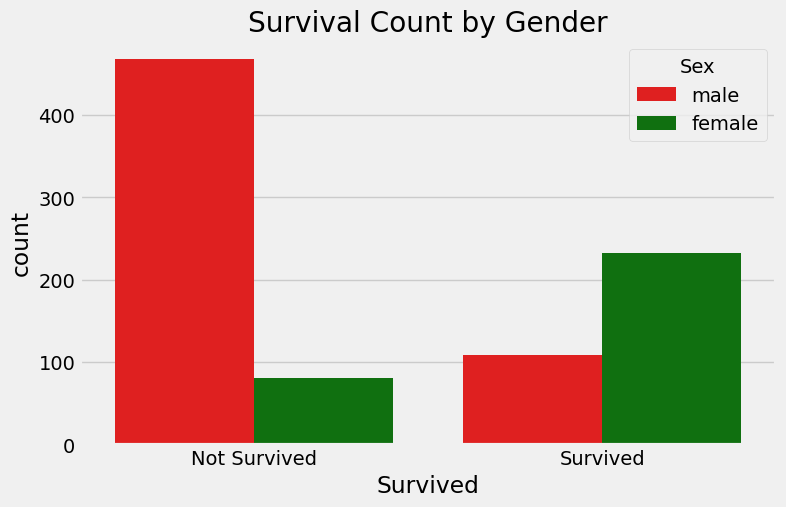

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print(train.head())
survived = 'Survived'
not_survived = 'Not Survived'
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.countplot(x='Survived', hue='Sex', data=train, palette={'female': 'g', 'male': 'r'})
ax.set_xticklabels([not_survived, survived])
ax.set_title('Survival Count by Gender')
plt.show()

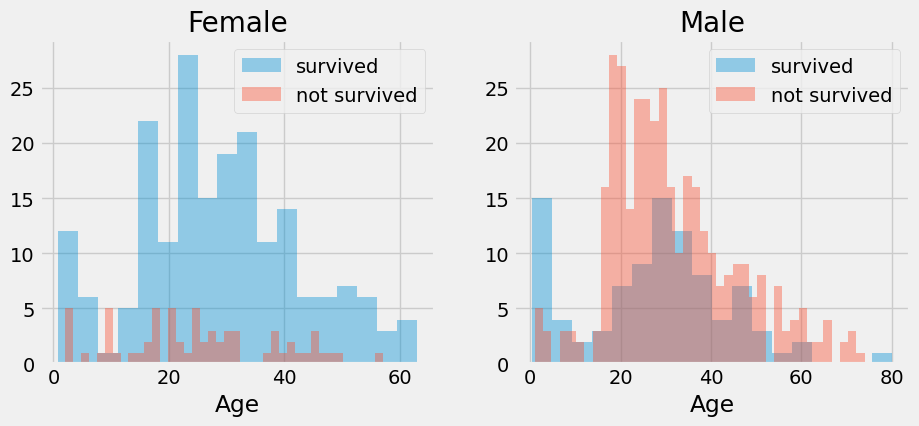

In [7]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train[train['Sex']=='female']
men = train[train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

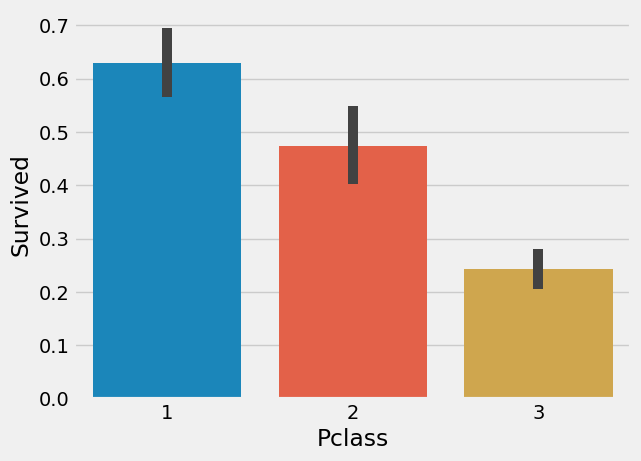

In [8]:
sns.barplot(x='Pclass', y='Survived', data=train)

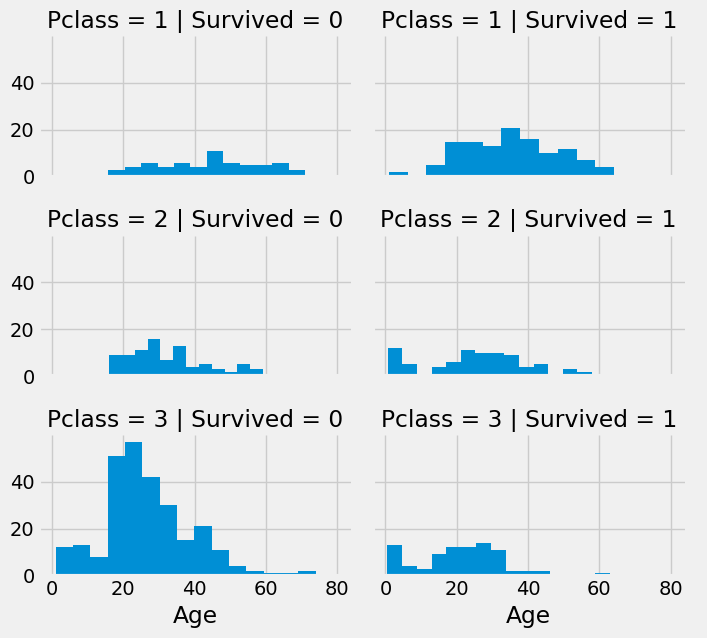

In [9]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=15)
grid.add_legend()

In [10]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

In [11]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [12]:
train = train.fillna({"Embarked": "S"})

In [13]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
		'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels)


In [14]:
combine = [train, test]
for dataset in combine:
	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])
for dataset in combine:
	dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
												'Don', 'Dr', 'Major',
												'Rev', 'Jonkheer', 'Dona'],
												'Rare')

	dataset['Title'] = dataset['Title'].replace(
		['Countess', 'Lady', 'Sir'], 'Royal')
	dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
	dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,
				"Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
	dataset['Title'] = dataset['Title'].map(title_mapping)
	dataset['Title'] = dataset['Title'].fillna(0)

In [15]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()
master_age = train[train["Title"] == 4]["AgeGroup"].mode()
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()

age_title_mapping = {1: "Young Adult", 2: "Student",
					3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["AgeGroup"])):
	if train["AgeGroup"][x] == "Unknown":
		train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["AgeGroup"])):
	if test["AgeGroup"][x] == "Unknown":
		test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [16]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
			'Student': 4, 'Young Adult': 5, 'Adult': 6,
			'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)

In [17]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [18]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [19]:
for x in range(len(test["Fare"])):
	if pd.isnull(test["Fare"][x]):
		pclass = test["Pclass"][x]
		test["Fare"][x] = round(
			train[train["Pclass"] == pclass]["Fare"].mean(), 4)

train['FareBand'] = pd.qcut(train['Fare'], 4,
							labels=[1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4,
						labels=[1, 2, 3, 4])

train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)

In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
CabinBool      0
AgeGroup       0
Title          0
FareBand       0
dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Embarked     891 non-null    int64   
 7   CabinBool    891 non-null    int64   
 8   AgeGroup     891 non-null    float64 
 9   Title        891 non-null    int64   
 10  FareBand     891 non-null    category
dtypes: category(1), float64(1), int64(9)
memory usage: 70.8 KB


In [23]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,CabinBool,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,0,4.0,1,1
1,2,1,1,1,1,0,2,1,6.0,3,4
2,3,1,3,1,0,0,1,0,5.0,2,2
3,4,1,1,1,1,0,1,1,5.0,3,4
4,5,0,3,0,0,0,1,0,5.0,1,2
5,6,0,3,0,0,0,3,0,5.0,1,2
6,7,0,1,0,0,0,1,1,6.0,1,4
7,8,0,3,0,3,1,1,0,1.0,4,3
8,9,1,3,1,0,2,1,0,5.0,3,2
9,10,1,2,1,1,0,2,0,3.0,3,3


In [25]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(
	predictors, target, test_size=0.2, random_state=0)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)


83.24


In [34]:
!pip install scikit-learn


In [37]:
!pip install sklearn.impute

ERROR: Could not find a version that satisfies the requirement sklearn.impute (from versions: none)
ERROR: No matching distribution found for sklearn.impute


In [38]:
from sklearn.impute import SimpleImputer

In [44]:
from sklearn.impute import SimpleImputer

ids = test['PassengerId']
features_test = test.drop(['PassengerId', 'Survived'], axis=1)

imputer = SimpleImputer(strategy='mean')
features_test_imputed = imputer.fit_transform(features_test)

predictions = randomforest.predict(features_test_imputed)

output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('resultfile.csv', index=False)


In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(train.drop('Survived', axis=1), train['Survived'])

importances = pd.DataFrame({'feature': train.drop('Survived', axis=1).columns, 'importance': np.round(random_forest.feature_importances_, 3)})

importances = importances.sort_values('importance', ascending=False).set_index('feature')

print(importances.head(15))


             importance
feature                
PassengerId       0.295
Title             0.182
Sex               0.132
AgeGroup          0.083
Pclass            0.082
FareBand          0.066
SibSp             0.053
CabinBool         0.040
Embarked          0.036
Parch             0.030


<Axes: xlabel='feature'>

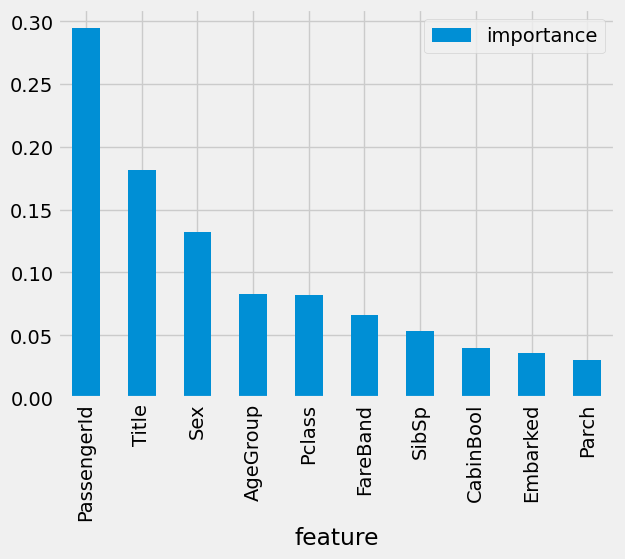

In [54]:
importances.plot.bar()

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

randomforest = RandomForestClassifier()

randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)

acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.92


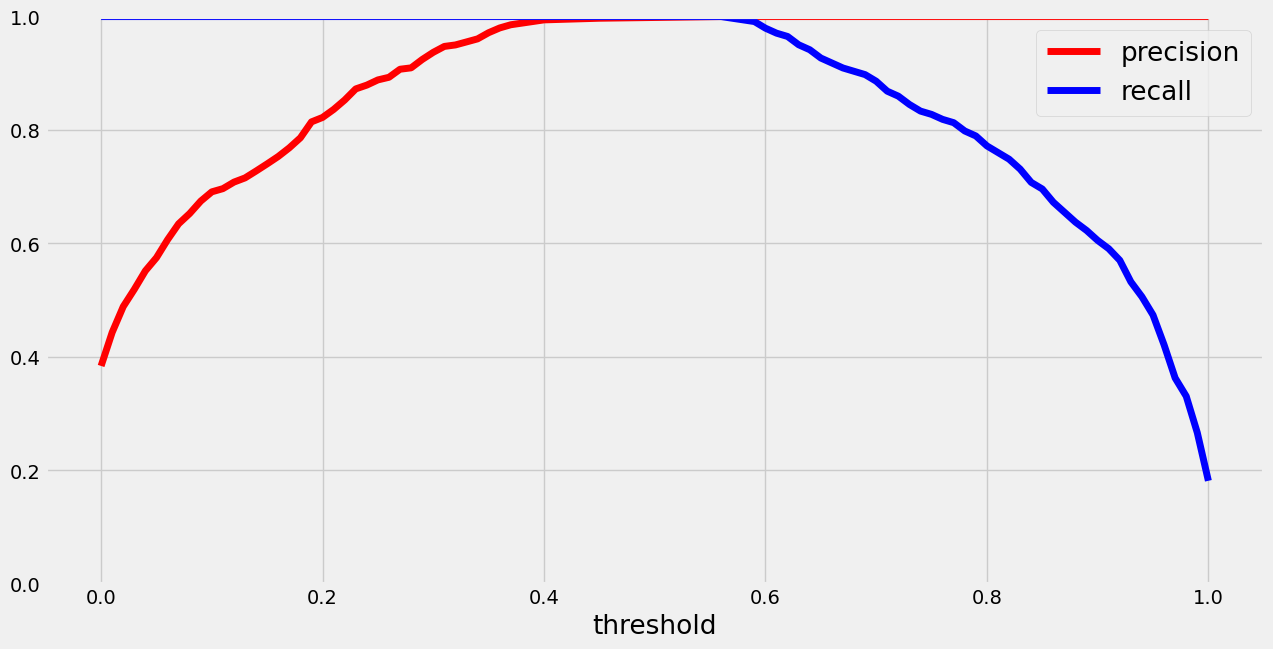

In [64]:
from sklearn.metrics import precision_recall_curve

features_train = train.drop('Survived', axis=1)

y_scores = random_forest.predict_proba(features_train)
y_scores = y_scores[:, 1]

precision, recall, threshold = precision_recall_curve(train['Survived'], y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()



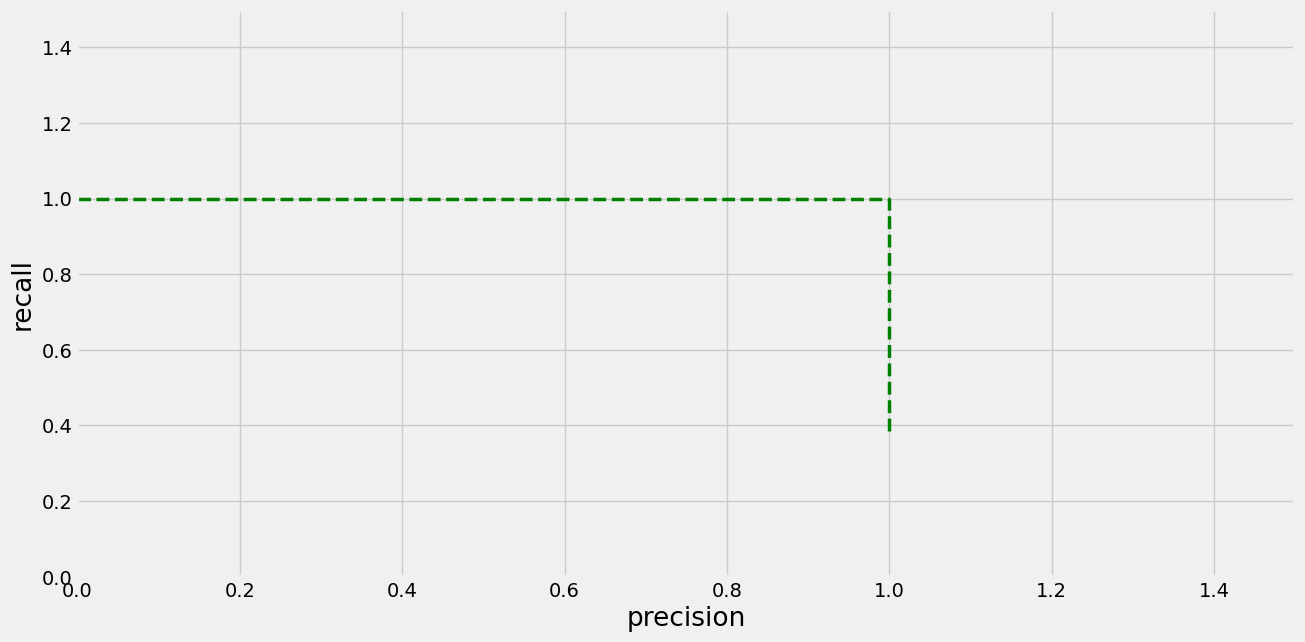

In [65]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

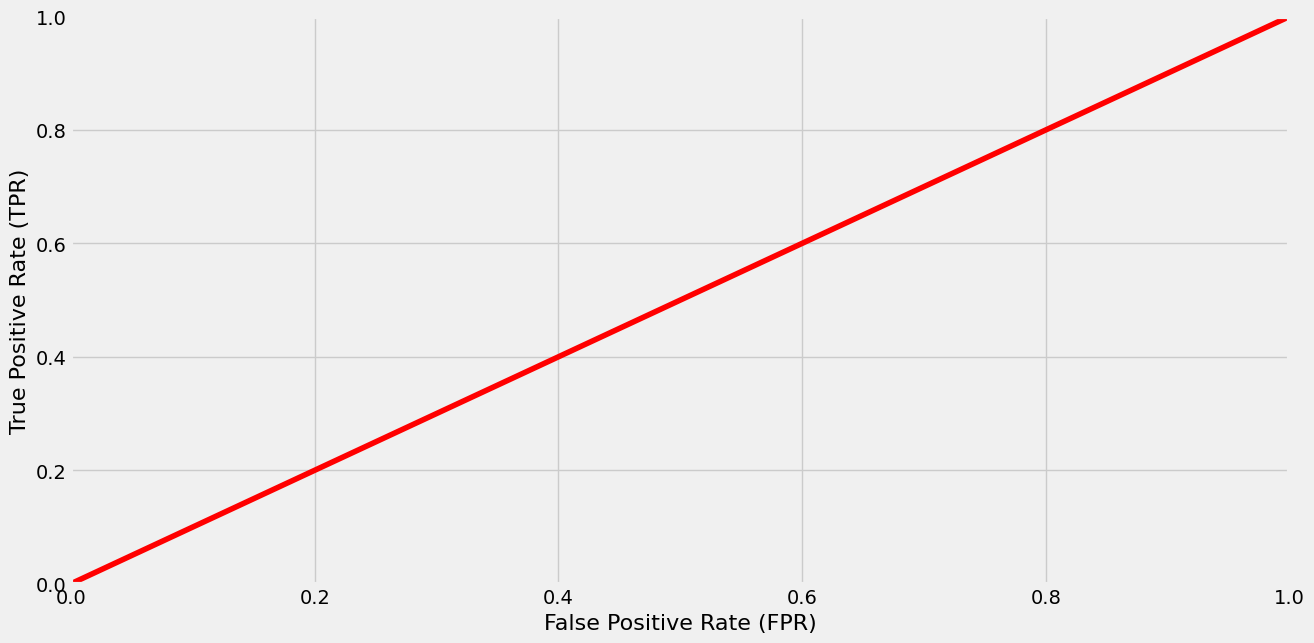

In [67]:
from sklearn.metrics import roc_curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(train['Survived'], y_scores)

def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()
